<a href="https://colab.research.google.com/github/alifele/Machine_learning/blob/master/TensorFlow/Uploading_your_own_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Navigating through github to access the data

In [1]:
!git clone https://github.com/ardamavi/Dog-Cat-Classifier.git

Cloning into 'Dog-Cat-Classifier'...
remote: Enumerating objects: 1654, done.
remote: Total 1654 (delta 0), reused 0 (delta 0), pack-reused 1654
Receiving objects: 100% (1654/1654), 34.83 MiB | 26.05 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [2]:
!ls

Dog-Cat-Classifier  sample_data


In [4]:
%ls


Dog-Cat-Classifier/  sample_data/


In [6]:
%cd Dog-Cat-Classifier
%ls

/content/Dog-Cat-Classifier
Data/           LICENSE     README.md         test_dog.jpg
get_dataset.py  Model.png   requirements.txt  train.py
get_model.py    predict.py  test_cat.jpg


In [7]:
%cd Data
%ls 

/content/Dog-Cat-Classifier/Data
Checkpoints/  Layer_Outputs/  Model/  npy_train_data/  Train_Data/


In [8]:
%cd Train_Data
%ls

/content/Dog-Cat-Classifier/Data/Train_Data
cat/  dog/


In [0]:
%cd dog 
%ls

In [10]:
%pwd   #this will print the Working Direcctory

'/content/Dog-Cat-Classifier/Data/Train_Data/dog'

#Reading all of the images in the directory
in this section I will make two lists that cointrain the images of dogs and cats seperatly

In [0]:
import cv2
import matplotlib.pyplot as plt
import os
images = []
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images
  
dog_images = load_images_from_folder('/content/Dog-Cat-Classifier/Data/Train_Data/dog')
cat_images = load_images_from_folder('/content/Dog-Cat-Classifier/Data/Train_Data/cat')

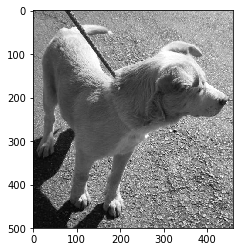

In [24]:
plt.imshow(dog_images[12], cmap='gray')

#Resizing all of the images
the different images in this data set has different sizes. some of them are landscape some are vertical and so on. But to train a neural network we need to neurish the network with data all of them have same features size.

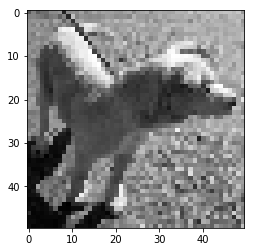

In [32]:
IMG_SIZE = 50
dog = []  #list containing the 50*50 images of dogs
cat = []  #list containing the 50*50 images of cats
for dog_im in dog_images: 
  dog.append(cv2.resize(dog_im, (IMG_SIZE, IMG_SIZE)))
for cat_im in cat_images:
  cat.append(cv2.resize(cat_im, (IMG_SIZE, IMG_SIZE)))
plt.imshow(dog[12], cmap='gray')